In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import functions.add_path
import functions.et_condition_df as condition_df

import functions.et_helper as et_helper
import functions.plotnine_theme
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# this (for some reason) allows to edit text in illustrator 
# source: http://jonathansoma.com/lede/data-studio/matplotlib/exporting-from-matplotlib-to-open-in-adobe-illustrator/

matplotlib.rcParams['svg.fonttype'] = 'none'
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.subplot.left'] =  0.2
from plotnine import *
from plotnine.data import *

from plotnine.options import figure_size as figsize


import be_load

/home/student/b/behinger/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
import os
print(os.getcwd())
if os.getcwd()[-4:] != 'code':
    try:
        os.chdir('./code')
    except:
        os.chdir('/net/store/nbp/users/behinger/projects/etcomp/code')


/net/store/nbp/users/behinger/projects/etcomp/code


In [5]:
datapath = '/net/store/nbp/projects/etcomp/'
etsamples = pd.DataFrame()
etmsgs= pd.DataFrame()
etevents = pd.DataFrame()

for et in ['el','pl']:
    elsamples, elmsgs, elevents = et_helper.load_file(et,'VP3',datapath=datapath)
    etsamples = pd.concat([etsamples,elsamples.assign(eyetracker=et)],ignore_index=True, sort=False)
    etmsgs    = pd.concat([etmsgs,      elmsgs.assign(eyetracker=et)],ignore_index=True, sort=False)
    etevents  = pd.concat([etevents,  elevents.assign(eyetracker=et)],ignore_index=True, sort=False)

In [47]:

def get_data(TYPE):
    out = pd.DataFrame()

    for block in np.array(range(6))+1:
        for et in ['el','pl']:
            query = 'block==@block&condition==@TYPE&eyetracker==@et'
            
            start = etmsgs.query(query+'&exp_event=="start"').msg_time.values
            stop  = etmsgs.query(query+'&exp_event=="stop"').msg_time.values
            newsamples = etsamples.query("smpl_time>@start & smpl_time<@stop&eyetracker==@et")
            newsamples['block'] = block
            out = pd.concat([out,newsamples],sort=False)
    return(out)

            
            

In [48]:
gridsamples = get_data("GRID")

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [58]:
gridsamples.to_csv('thesisart_grid.csv')

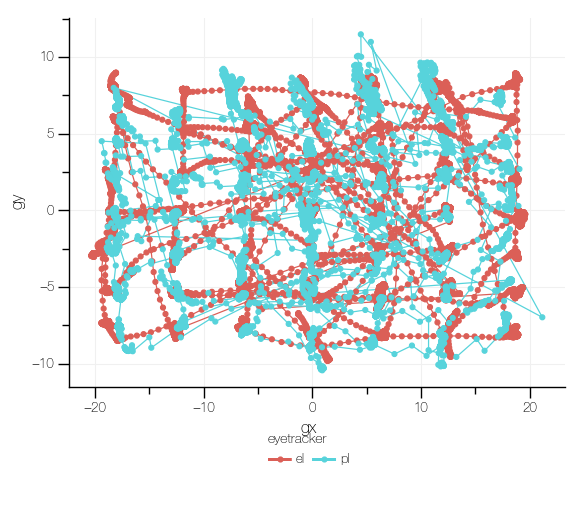

<ggplot: (-9223363253302773588)>

In [33]:
#ggplot(gridsamples,aes(x="gx",y="gy",color="eyetracker"))+geom_path()+geom_point()+facet_wrap("block",ncol=2)
ggplot(gridsamples.query("block==1"),aes(x="gx",y="gy",color="eyetracker"))+geom_path()+geom_point()

In [46]:
ggplot(gridsamples.query("block<=3"),aes(x="gx",y="gy"))+geom_path()+geom_point()+facet_grid("block~eyetracker")

In [8]:
etmsgs.query("condition=='SMOOTH'").exp_event.unique()

array(['start', 'trialstart', 'trialend', 'stop'], dtype=object)

In [59]:
smoothsamples =get_data("SMOOTH")
smoothsamples.to_csv('thesisart_smooth.csv')

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


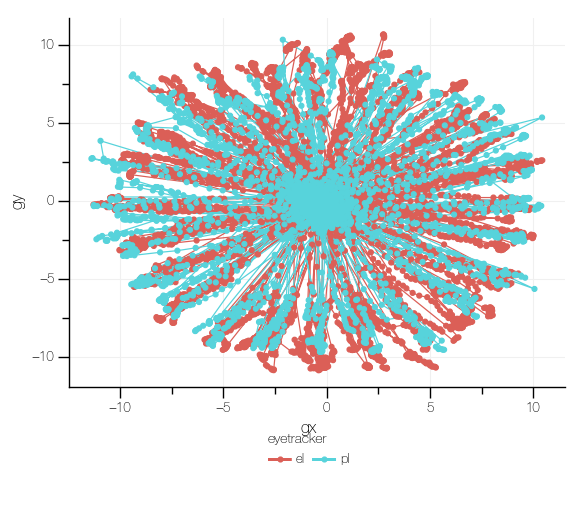

<ggplot: (-9223363253311288460)>

In [35]:
ggplot(smoothsamples.loc[::10,],aes(x="gx",y="gy",color="eyetracker"))+geom_path()+geom_point()

In [60]:
ms = get_data("MICROSACC")
ms.to_csv('thesisart_ms.csv')

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


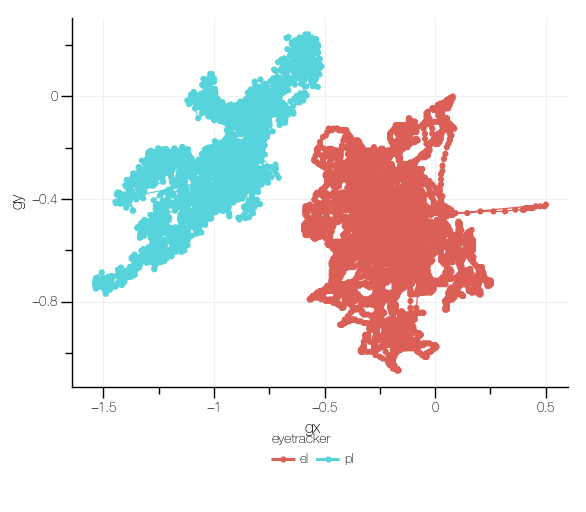

<ggplot: (-9223363253298422412)>

In [49]:
ggplot(ms.query("block==3"),aes(x="gx",y="gy",color="eyetracker"))+geom_path()+geom_point()

In [61]:
fv = get_data("FREEVIEW")
fv.to_csv('thesisart_fv.csv')

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


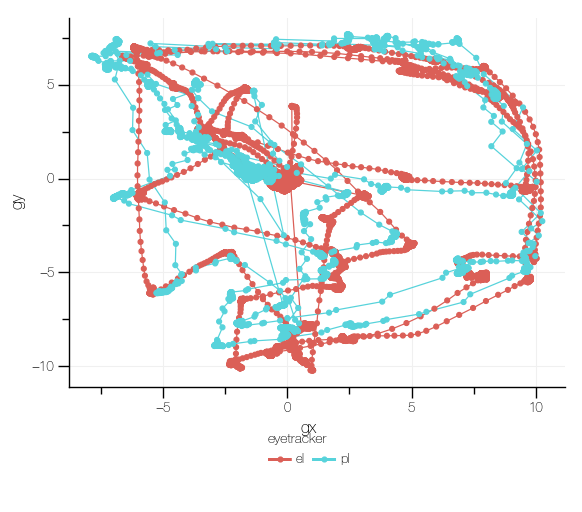

<ggplot: (8783542518676)>

In [62]:
ggplot(fv.query("block==2"),aes(x="gx",y="gy",color="eyetracker"))+geom_path()+geom_point()

In [ ]:
blink = get_data("BLINK")
#fv.to_csv('thesisart_fv.csv')

In [106]:
for bl in np.array(range(6))+1:
    ix = np.where((blink.eyetracker=='pl') & (blink.block==bl))[0]
    blink.smpl_time.iloc[ix] = blink.smpl_time.iloc[ix]-blink.smpl_time.iloc[ix[0]]
    ix = np.where((blink.eyetracker=='el')&(blink.block==bl))[0]
    blink.smpl_time.iloc[ix] = blink.smpl_time.iloc[ix]-blink.smpl_time.iloc[ix[0]]
blink.to_csv('thesisart_blink.csv')    

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


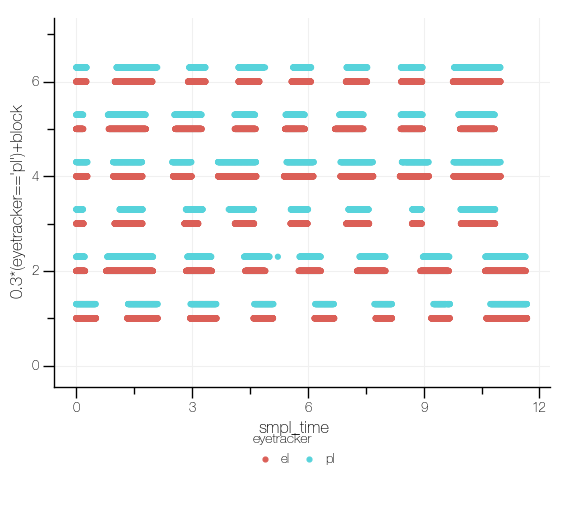

<ggplot: (-9223363253311237516)>

In [82]:
ggplot(blink,aes(x="smpl_time",y="0.3*(eyetracker=='pl')+block",color="eyetracker"))+geom_point()+ylim([-0.1,7])

In [93]:
etmsgs.condition.unique()

array(['METAEX', 'Connect', '!CAL', 'VALIDATE', 'v', 'C', 'c', 'R',
       'Instruction', 'startingET', 'RECCFG', 'ELCLCFG', 'GAZE_COORDS',
       'THRESHOLDS', 'ELCL_PROC', 'ELCL_EFIT_PARAMS', '!MODE', 'GRID',
       'SMOOTH', 'FREEVIEW', 'MICROSACC', 'BLINK', 'DILATION',
       'SMALLGRID_BEFORE', 'SHAKE', 'TILT', 'SMALLGRID_AFTER', 'Finished',
       'r'], dtype=object)

In [95]:
dil = get_data("DILATION")

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [107]:
for bl in np.array(range(6))+1:
    ix = np.where((dil.eyetracker=='pl') & (dil.block==bl))[0]
    dil.smpl_time.iloc[ix] = dil.smpl_time.iloc[ix]-dil.smpl_time.iloc[ix[0]]
    ix = np.where((dil.eyetracker=='el')&(dil.block==bl))[0]
    dil.smpl_time.iloc[ix] = dil.smpl_time.iloc[ix]-dil.smpl_time.iloc[ix[0]]
    
ix = np.where((dil.eyetracker=='pl'))[0]
dil.pa.iloc[ix] = dil.pa.iloc[ix]/np.max(dil.pa.iloc[ix])
ix = np.where((dil.eyetracker=='el'))[0]
dil.pa.iloc[ix] = dil.pa.iloc[ix]/np.max(dil.pa.iloc[ix])

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [108]:
dil.to_csv('thesisart_dil.csv')

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


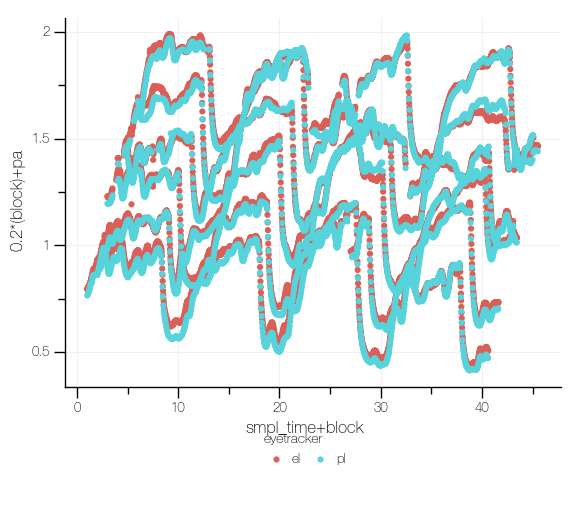

<ggplot: (-9223363253311175564)>

In [105]:
ggplot(dil.iloc[::10],aes(x="smpl_time+block",y="0.2*(block)+pa",color="eyetracker"))+geom_point()

In [101]:
etsamples.columns

Index(['gx', 'gy_vel', 'gx_vel', 'smpl_time', 'pa', 'gy', 'type', 'confidence',
       'outside', 'zero_pa', 'neg_time', 'blink_id', 'eyetracker'],
      dtype='object')